In [178]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np

In [179]:
sim = rebound.Simulation()
#sim.units = ('AU', 'yr', 'Msun')
sim.add(m=1)
#sim.add("Jupiter")
sim.add(m=0.0009547919099366768, x=4.700873257350307, y=-1.638871658756794, z=-0.09837100227914734, vx=0.1391574941369194, vy=0.4348006080824522, vz=-0.004917193679728236)
sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .01

# create astroid
mass = 1e-28
radius = 2.502
#radius = 3.1
omega =(0.5*np.pi)
ecc = 0.2

sim.add(m=mass,a=radius,omega=omega, e=ecc)

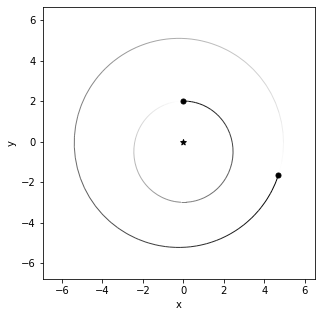

In [180]:
fig = rebound.OrbitPlot(sim)

In [181]:
a_list = []
i_list = []
for i in np.arange (1000.*2.*np.pi):
    sim.integrate(i)
    i_list.append(i)
    a_list.append(sim.particles[2].a)


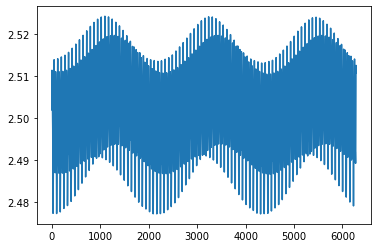

2.501942439410884


In [182]:
plt.plot(i_list,a_list)
plt.show()
print(sum(a_list)/len(a_list))